In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd

In [42]:
df = pd.read_csv("/content/drive/MyDrive/Twitter.csv", error_bad_lines=False)

In [43]:
print(df.head(10))

   Unnamed: 0             post_id                    post_created  \
0           0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1           1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2           2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3           3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4           4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   
5           5  637692793083817985  Sat Aug 29 18:26:24 +0000 2015   
6           6  637691649943072772  Sat Aug 29 18:21:51 +0000 2015   
7           7  637689418472652800  Sat Aug 29 18:12:59 +0000 2015   
8           8  637687177946734592  Sat Aug 29 18:04:05 +0000 2015   
9           9  637684866906255360  Sat Aug 29 17:54:54 +0000 2015   

                                           post_text     user_id  followers  \
0  It's just over 2 years since I was diagnosed w...  1013187241         84   
1  It's Sunday, I need a break, so I'm planning t...  1013187241         84   
2  

In [44]:
print(df.columns)

Index(['Unnamed: 0', 'post_id', 'post_created', 'post_text', 'user_id',
       'followers', 'friends', 'favourites', 'statuses', 'retweets', 'label'],
      dtype='object')


In [ ]:
# Performing "text preprocessing" to remove unwanted words like is,an,the, punctuation marks etc.

In [45]:
import re
from gensim.parsing.preprocessing import STOPWORDS


# Combine Gensim's English stopwords with custom stopwords and Hinglish stopwords
stopwords = STOPWORDS

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stopwords])

# Function to remove links using regex
def remove_links(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

df['text_no_stopwords'] = df['post_text'].apply(remove_stopwords)
df['filtered'] = df['text_no_stopwords'].apply(remove_links)

# Display the result
print(df[['post_text', 'text_no_stopwords', 'filtered']])

                                               post_text  \
0      It's just over 2 years since I was diagnosed w...   
1      It's Sunday, I need a break, so I'm planning t...   
2      Awake but tired. I need to sleep but my brain ...   
3      RT @SewHQ: #Retro bears make perfect gifts and...   
4      It’s hard to say whether packing lists are mak...   
...                                                  ...   
19995              A day without sunshine is like night.   
19996  Boren's Laws: (1) When in charge, ponder. (2) ...   
19997  The flow chart is a most thoroughly oversold p...   
19998  Ships are safe in harbor, but they were never ...   
19999     Black holes are where God is dividing by zero.   

                                       text_no_stopwords  \
0      It's 2 years diagnosed #anxiety #depression. T...   
1      It's Sunday, need break, I'm planning spend li...   
2                 Awake tired. need sleep brain ideas...   
3      RT @SewHQ: #Retro bears perfect 

In [9]:
!pip install spacy


!python -m spacy download en_core_web_sm



2023-11-28 11:41:14.375779: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 11:41:14.375844: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 11:41:14.375877: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-28 11:41:14.386448: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 11:41:15.563775: W tensorflow/compiler/

In [46]:
# Q: How to remove noise from the text and extract meaningful words
# ans: By finding out fundamental or base words through lemmatization 
# Analysis: 'diagnosed' lemmatized to 'diagnose'
#            'breaking' lemmatized to break 
#   Reduced 'ing' words to their base form


import spacy
import pandas as pd


# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

df['filtered'] = df['filtered'].apply(lambda x: ' '.join([token.lemma_ for token in nlp(x)]))

print(df[['filtered', 'filtered']])

                                                filtered  \
0      it be 2 year diagnose # anxiety # depression ....   
1      it be Sunday , need break , I be plan spend li...   
2                awake tired . need sleep brain idea ...   
3      RT @sewhq : # retro bear perfect gift great be...   
4      it ’ hard packing list make life easy reinforc...   
...                                                  ...   
19995                          day sunshine like night .   
19996  Boren 's law : ( 1 ) charge , ponder . ( 2 ) t...   
19997  flow chart thoroughly oversell piece program d...   
19998              Ships safe harbor , mean stay there .   
19999                       black hole God divide zero .   

                                                filtered  
0      it be 2 year diagnose # anxiety # depression ....  
1      it be Sunday , need break , I be plan spend li...  
2                awake tired . need sleep brain idea ...  
3      RT @sewhq : # retro bear perfect gif

In [47]:
# Q: How to maintain privacy of individuals mentioned in the tweets
# ans: Removing mentions through preprocessing
# Analusis: The code has been cleaned by removing all sort of tagged twitter accounts in the tweets

import re

def remove_mentions(text):
    # Define a case-insensitive regular expression pattern for mentions
    mention_pattern = r'@\w+'

    # Use re.sub to replace mentions with an empty string
    cleaned_text = re.sub(mention_pattern, '', text, flags=re.IGNORECASE)

    return cleaned_text

# Apply the remove_mentions function to the 'post_text' column
df['filtered'] = df['filtered'].apply(remove_mentions)

# Print the DataFrame with the original and cleaned text
print(df[['filtered']])



                                                filtered
0      it be 2 year diagnose # anxiety # depression ....
1      it be Sunday , need break , I be plan spend li...
2                awake tired . need sleep brain idea ...
3      RT  : # retro bear perfect gift great beginner...
4      it ’ hard packing list make life easy reinforc...
...                                                  ...
19995                          day sunshine like night .
19996  Boren 's law : ( 1 ) charge , ponder . ( 2 ) t...
19997  flow chart thoroughly oversell piece program d...
19998              Ships safe harbor , mean stay there .
19999                       black hole God divide zero .

[20000 rows x 1 columns]


In [48]:
print(df.head(10))

   Unnamed: 0             post_id                    post_created  \
0           0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015   
1           1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015   
2           2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015   
3           3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015   
4           4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015   
5           5  637692793083817985  Sat Aug 29 18:26:24 +0000 2015   
6           6  637691649943072772  Sat Aug 29 18:21:51 +0000 2015   
7           7  637689418472652800  Sat Aug 29 18:12:59 +0000 2015   
8           8  637687177946734592  Sat Aug 29 18:04:05 +0000 2015   
9           9  637684866906255360  Sat Aug 29 17:54:54 +0000 2015   

                                           post_text     user_id  followers  \
0  It's just over 2 years since I was diagnosed w...  1013187241         84   
1  It's Sunday, I need a break, so I'm planning t...  1013187241         84   
2  

Number of tweets:  20000


(5, 107)
     thanks    voting    center  @zaynmalik      you.      &gt;       ok  \
0  0.005163  0.002227  0.001885    0.001826  0.001783  0.001742  0.00167   
1  0.001273  0.000000  0.000000    0.000000  0.000792  0.000000  0.00000   
2  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.00000   
3  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.00000   
4  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.00000   

        one    white       me:  ...      know    taylor       lol   twitter  \
0  0.001431  0.00139  0.001352  ...  0.000000  0.000000  0.000000  0.000000   
1  0.000780  0.00000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2  0.001237  0.00000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
4  0.001120  0.00000  0.000000  ...  0.001228  0.001219  0.001217  0.001185   

       i've      need       see     sorry      wish  everyt

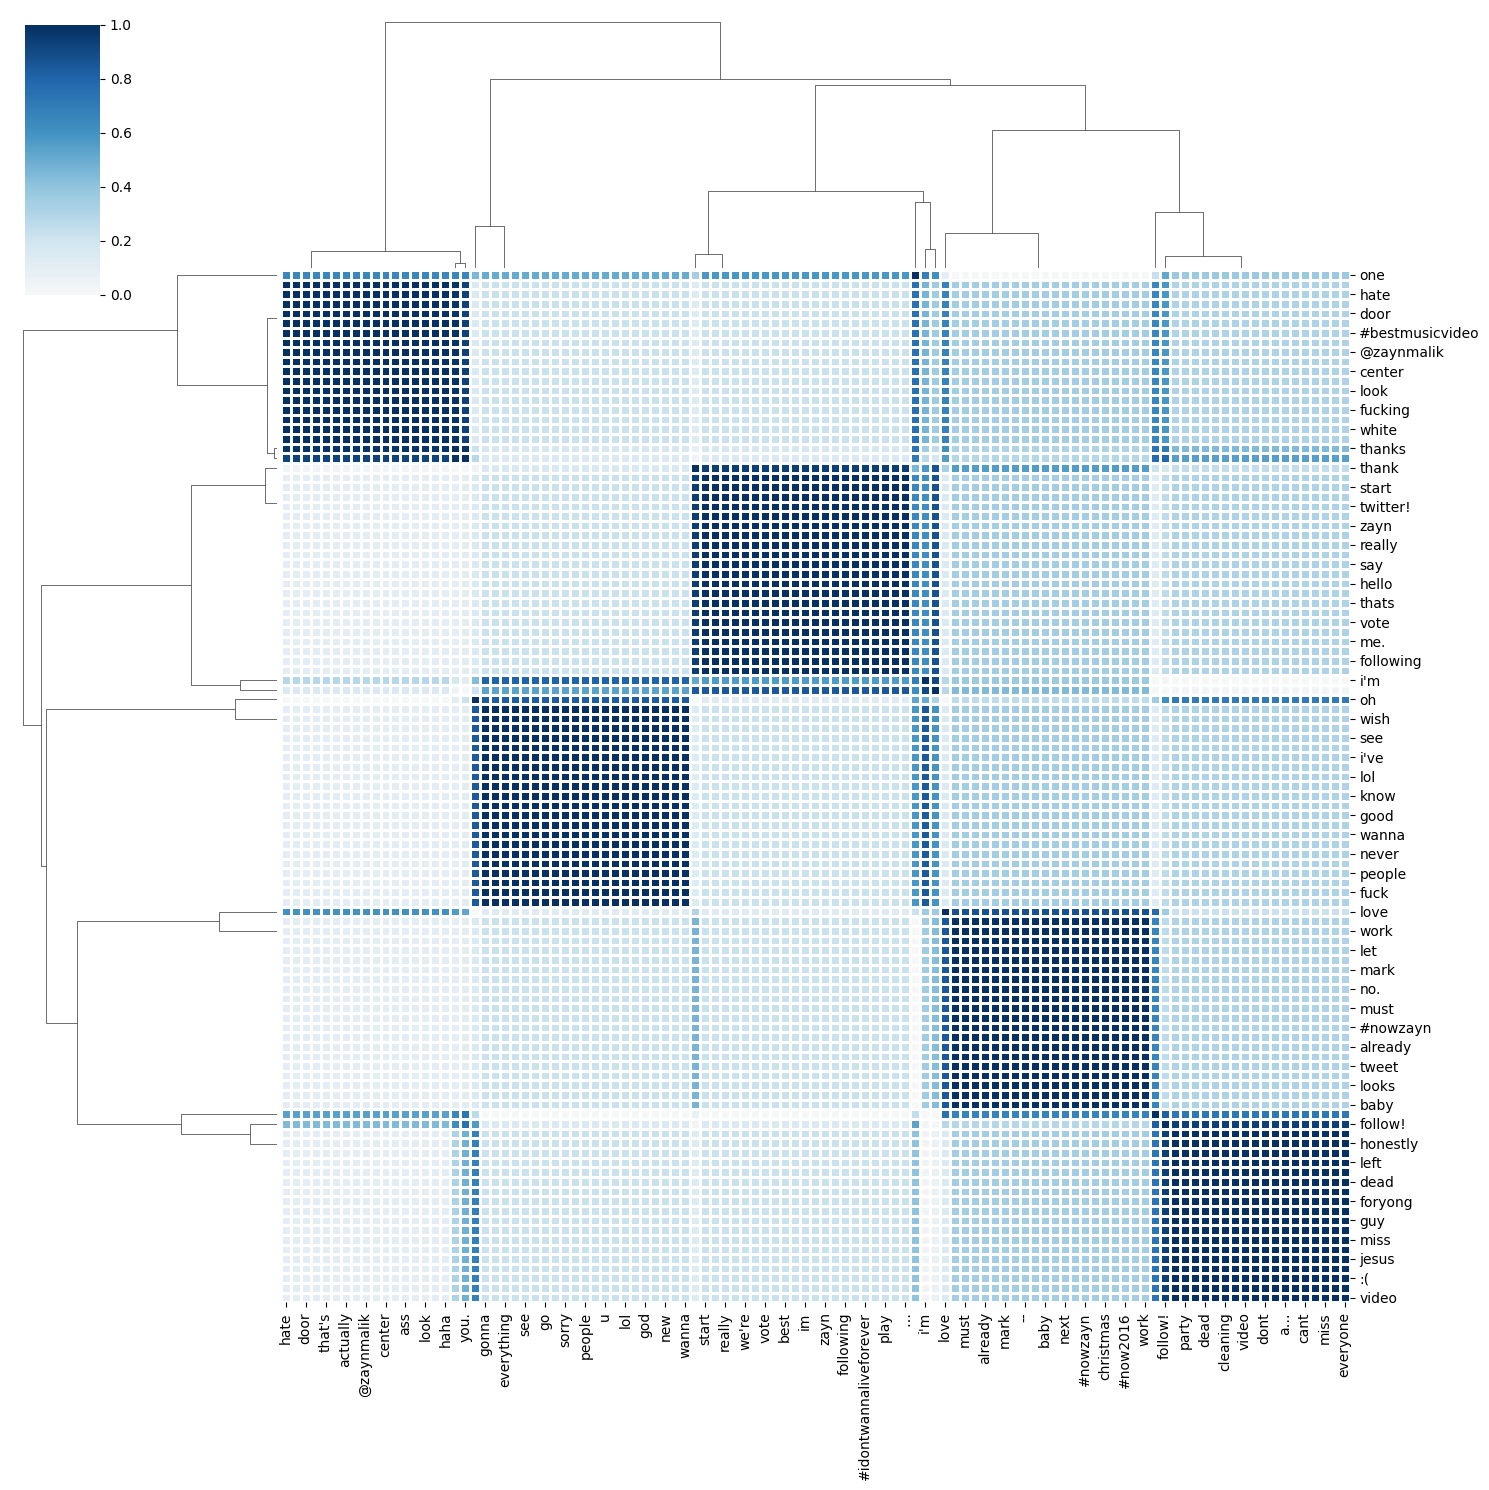

In [59]:
# Q: Why are we specifically analysing online social media data ?
# ans: In the recent times, usage of social media has exponentially increased as they provide a good medium 
#      to express ones thoughts without being exposed
#      
# Analysis: The graph shows the increase in tweet activity over the years specially peaking in 2015 and thereafter

import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile

init_notebook_mode(connected=True)  # do not miss this line

import warnings
warnings.filterwarnings("ignore")

datafile = '/content/drive/MyDrive/Twitter.csv'
tweets = pd.read_csv(datafile)

# Displaying the first 5 rows of your dataset
print("Number of tweets: ", len(tweets['post_text']))
tweets.head(5)

# Custom stopwords for mental health tweets
custom_stopwords = set(stopwords.words('english') + list(punctuation) + ['rt', 'via', ...])

# Extracting date and time from tweets
tweets['post_created'] = pd.to_datetime(tweets['post_created'])

# Plotting tweet activity over time
trace = go.Histogram(
    x=tweets['post_created'],
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Tweet Activity Over Time',
    height=450,
    width=1200,
    xaxis=dict(
        title='Date and Time'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# Preparing a corpus for analysis
corpus = [str(tweet) for tweet in tweets['post_text']]
texts = [[word for word in str(document).lower().split() if word not in custom_stopwords] for document in corpus]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(tempfile.gettempdir(), 'mental_health.dict'))
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(tempfile.gettempdir(), 'mental_health.mm'), corpus)

# TF-IDF transformation
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# LDA transformation
total_topics = 5
lda = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf]

# Showing first n important words in the topics
lda.show_topics(total_topics, 5)

# Creating DataFrame for LDA results
data_lda = {i: OrderedDict(lda.show_topic(i, 25)) for i in range(total_topics)}
df_lda = pd.DataFrame(data_lda).fillna(0).T

# Displaying the shape and DataFrame
print(df_lda.shape)
print(df_lda)

# Clustermap for LDA results
import matplotlib.pyplot as plt
g = sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()


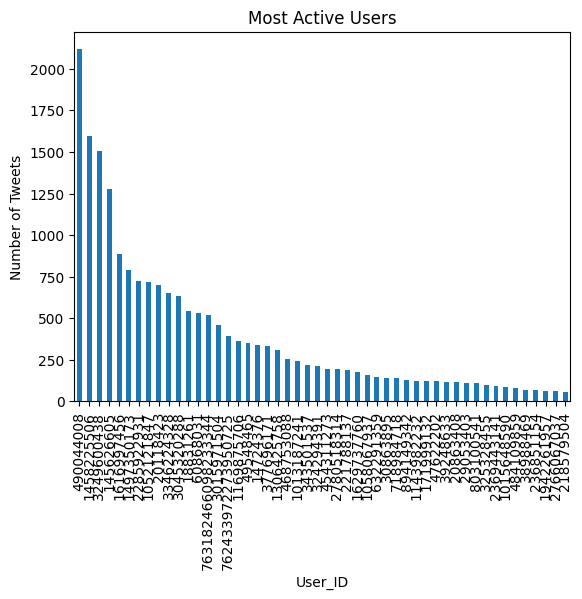

In [61]:
# Analysing the most active users

import pandas as pd
import matplotlib.pyplot as plt


# Counting the frequency of each unique user_id
user_id_counts = df['user_id'].value_counts().reset_index()
user_id_counts.columns = ['User_ID', 'Number of Tweets']

# Selecting the top 10 users based on frequency
top_10_users = user_id_counts.head(50)

# Plot the graph for the top 10 users
top_10_users.plot(kind='bar', x='User_ID', y='Number of Tweets', legend=False)
plt.title('Most Active Users')
plt.xlabel('User_ID')
plt.ylabel('Number of Tweets')
plt.show()

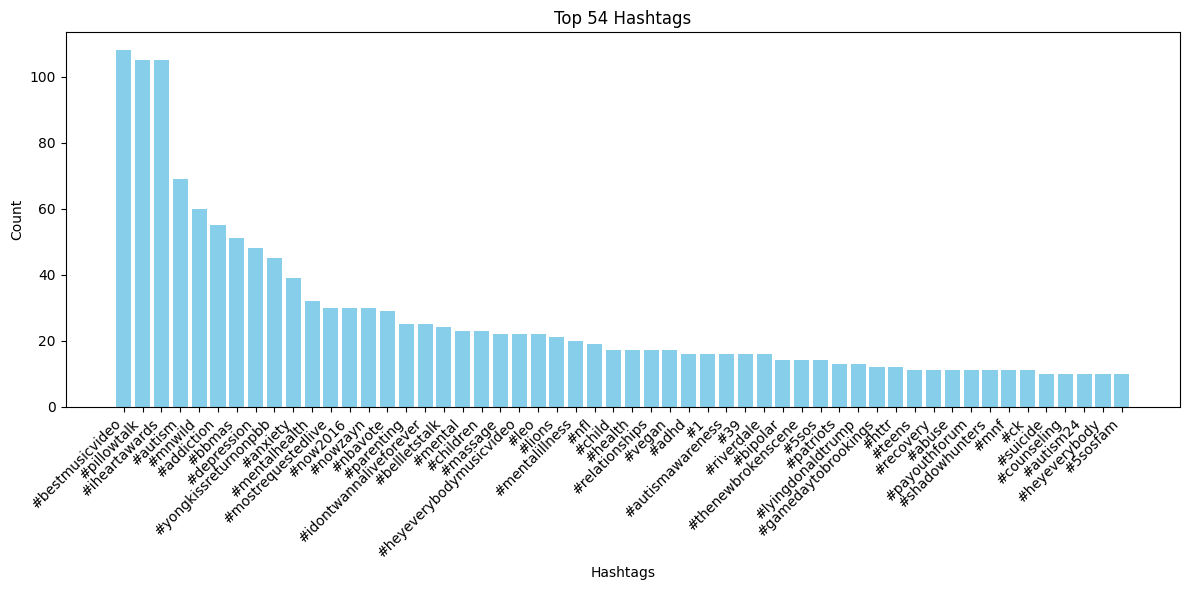

In [52]:
# Q: What are the trending topics that people are willing to talk about
# ans : Extracting hashtags from the tweets then provide a comprehensive analysis for the same 
# Analysis: Plotted a graph for all hashtags having a frequency greater than 10

import pandas as pd
import re
from collections import Counter

# Assuming 'df' is your DataFrame and 'post_text' is the column containing post text
df['hashtags'] = df['post_text'].apply(lambda x: re.findall(r'#\w+', str(x)))

# Flatten the list of hashtags
df['hashtags'] = df['hashtags'].apply(lambda x: [tag.lower() for tag in x])

# Count the occurrences of each hashtag
hashtag_counts = Counter(tag for hashtags in df['hashtags'] for tag in hashtags)

# Get the most common hashtags and their counts
most_common_hashtags = hashtag_counts.most_common()

# Display the top N hashtags (adjust N as needed)
top_n = 54
top_n_hashtags = dict(most_common_hashtags[:top_n])

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_n_hashtags.keys(), top_n_hashtags.values(), color='skyblue')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title(f'Top {top_n} Hashtags')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()





In [64]:
import pandas as pd
import re
from collections import Counter


hashtags = df['post_text'].apply(lambda x: re.findall(r'#\w+', str(x)))

# Flatten the list of hashtags
flat_hashtags = [tag.lower() for sublist in hashtags for tag in sublist]


hashtag_counts = Counter(flat_hashtags)
#print(hashtag_counts)


most_common_hashtags = hashtag_counts.most_common()

# Display the top N hashtags (adjust N as needed)
top_n = 54
print(f"Top {top_n} hashtags:")
for tag, count in most_common_hashtags[:top_n]:
    print(f"{tag}: {count}")


Top 54 hashtags:
#bestmusicvideo: 108
#pillowtalk: 105
#iheartawards: 105
#autism: 69
#mnwild: 60
#addiction: 55
#bbmas: 51
#depression: 48
#yongkissreturnonpbb: 45
#anxiety: 39
#mentalhealth: 32
#mostrequestedlive: 30
#now2016: 30
#nowzayn: 30
#nbavote: 29
#parenting: 25
#idontwannaliveforever: 25
#bellletstalk: 24
#mental: 23
#children: 23
#massage: 22
#heyeverybodymusicvideo: 22
#leo: 22
#lions: 21
#mentalillness: 20
#nfl: 19
#child: 17
#health: 17
#relationships: 17
#vegan: 17
#adhd: 16
#1: 16
#autismawareness: 16
#39: 16
#riverdale: 16
#bipolar: 14
#thenewbrokenscene: 14
#5sos: 14
#patriots: 13
#lyingdonaldtrump: 13
#gamedaytobrookings: 12
#httr: 12
#teens: 11
#recovery: 11
#abuse: 11
#payouthforum: 11
#shadowhunters: 11
#mnf: 11
#ck: 11
#suicide: 10
#counseling: 10
#autism24: 10
#heyeverybody: 10
#5sosfam: 10


<Figure size 1200x800 with 0 Axes>

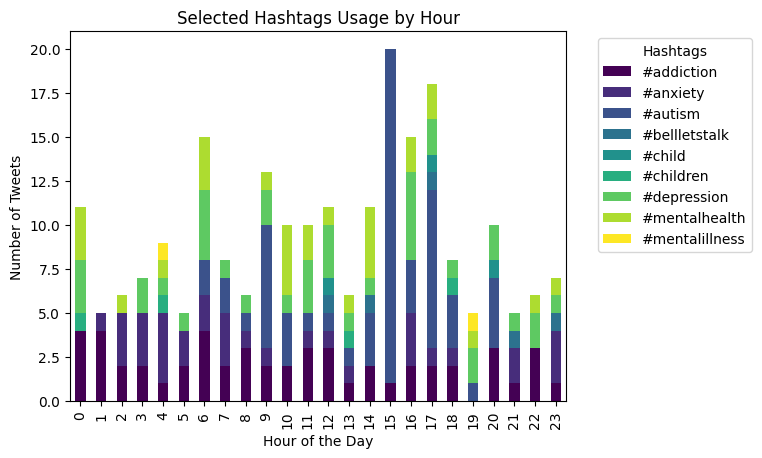

In [72]:
# Q: Investigate the temporal aspects of user behaviour in the context of the most trending topics
# ans: In context to our research, we selected a few hashtags closely related to mental health and emotional well being such as
#      #autism , #anxiety, #depression etc. and plottec their temporal frequencies
# Ananlysis:  a) 0 to 6am #addiction is discussed in significant proportion
#             b) #depression is disscussed btw 0 to 6am and peaked at 4pm
#             c) #anxiety during 2 to 5am 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df['post_created'] = pd.to_datetime(df['post_created'], format='%a %b %d %H:%M:%S +0000 %Y')


df['hour'] = df['post_created'].dt.hour


selected_hashtags = ['#autism','#addiction','#depression','#anxiety','#mentalhealth','#idontwannaliveforever','#bipolar','#abuse','#suicide','#counseling','#adhd','#bipolar']


# Filter DataFrame to include only rows with the selected hashtags
df_selected_hashtags = df[df['post_text'].str.contains('|'.join(selected_hashtags))]

# Count the occurrences of each selected hashtag at each hour
hashtag_hour_counts = df_selected_hashtags.explode('hashtags').groupby(['hour', 'hashtags']).size().unstack(fill_value=0)

# Plot the graph
plt.figure(figsize=(12, 8))
hashtag_hour_counts.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Selected Hashtags Usage by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.legend(title='Hashtags', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


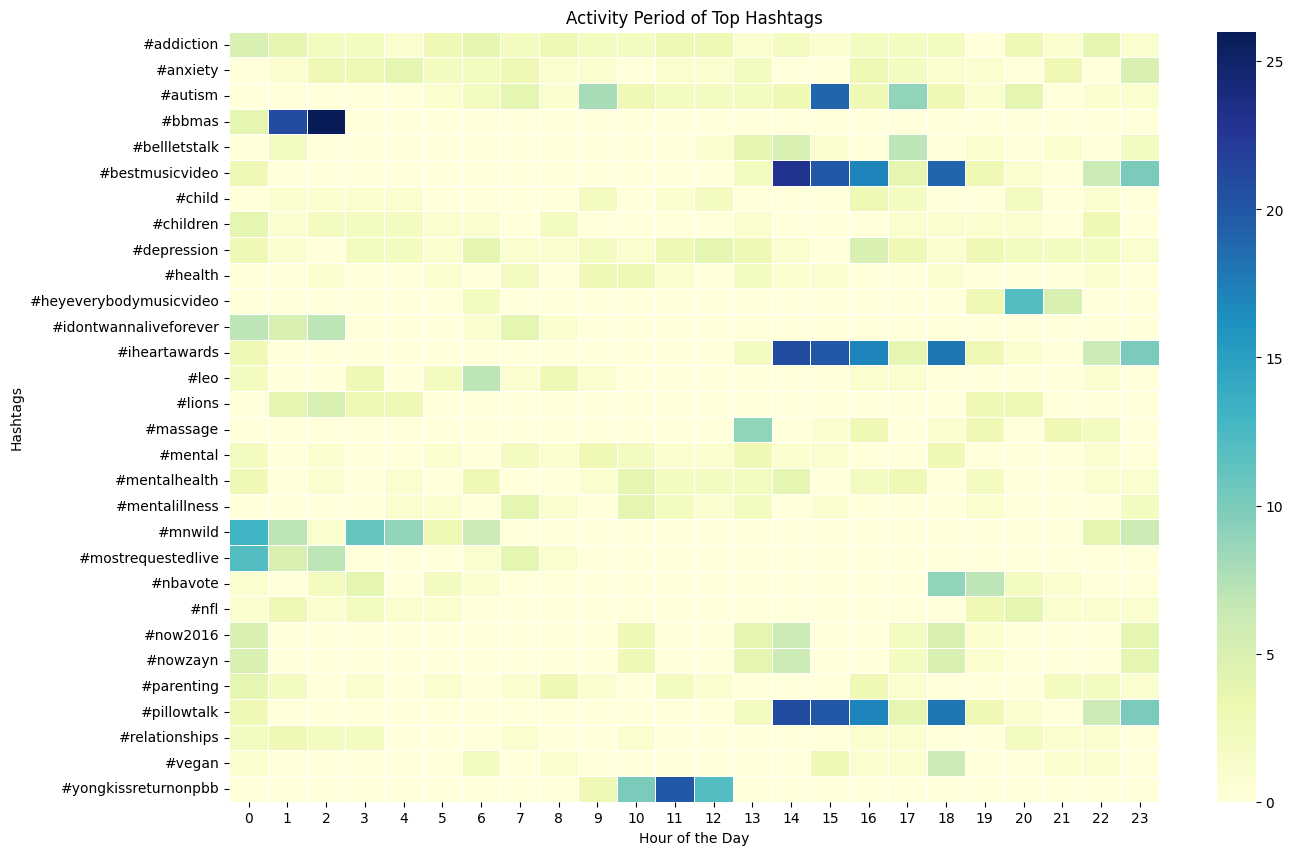

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


flat_hashtags = [tag.lower() for sublist in df['hashtags'] for tag in sublist]


hashtag_counts = Counter(flat_hashtags)


top_50_hashtags = [hashtag for hashtag, count in hashtag_counts.most_common(30)]


def extract_individual_hashtags(hashtag_list):
    return [tag.lower() for tag in hashtag_list if tag.lower() in top_50_hashtags]


df['hashtags'] = df['hashtags'].apply(extract_individual_hashtags)


df_top_50 = df[df['hashtags'].apply(lambda x: len(x) > 0)]


df_top_50_exploded = df_top_50.explode('hashtags')


df_top_50_exploded['post_created'] = pd.to_datetime(df_top_50_exploded['post_created'], format='%a %b %d %H:%M:%S +0000 %Y')


df_top_50_exploded['hour'] = df_top_50_exploded['post_created'].dt.hour


heatmap_data = df_top_50_exploded.groupby(['hashtags', 'hour']).size().unstack(fill_value=0)
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title('Activity Period of Top Hashtags')
plt.xlabel('Hour of the Day')
plt.ylabel('Hashtags')
plt.show()


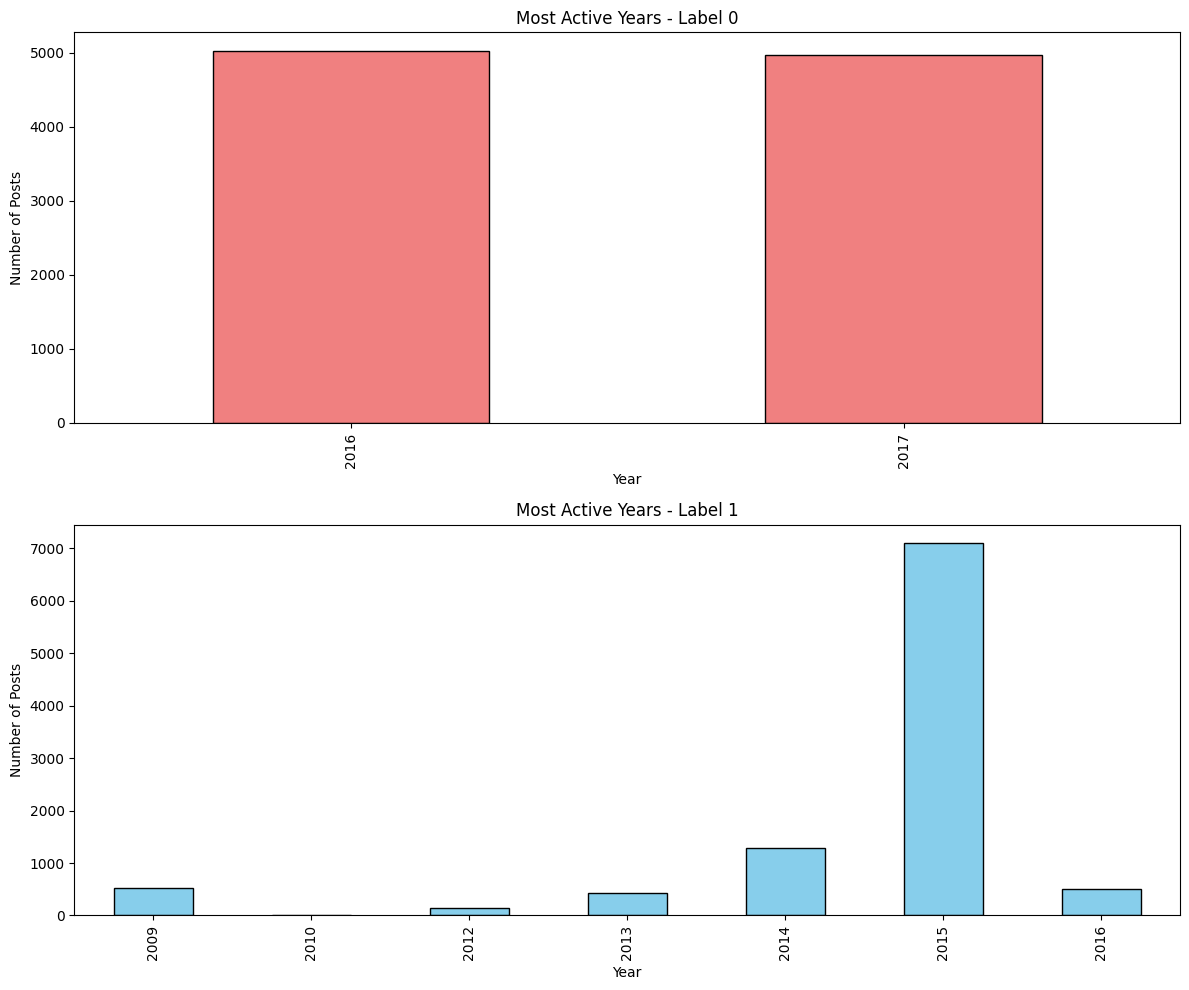

In [53]:
# Q: How to detect the activeness of depressed and non depressed users along the years
# ans: we have ensured activeness by visualizing the number of tweets posted by users of both categories along the years
# Analysis: Non Depressed users were found most active during 2016-17 while depressed were showing some sort of activeness
#           since 2009 and there was a sudden hike in their activeness during 2015

import pandas as pd
import matplotlib.pyplot as plt


df['post_created'] = pd.to_datetime(df['post_created'])
df['year'] = df['post_created'].dt.year

# Separate the DataFrame based on labels
df_label_0 = df[df['label'] == 0]
df_label_1 = df[df['label'] == 1]

# Calculate the count of posts for each year for label 0 and label 1
yearly_counts_label_0 = df_label_0['year'].value_counts().sort_index()
yearly_counts_label_1 = df_label_1['year'].value_counts().sort_index()

# Plotting the data
fig, axes = plt.subplots(nrows=2, figsize=(12, 10))

# Plot for Most Active Years - Label 0
yearly_counts_label_0.plot(kind='bar', ax=axes[0], color='lightcoral', edgecolor='black')
axes[0].set_title('Most Active Years - Label 0')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Posts')

# Plot for Most Active Years - Label 1
yearly_counts_label_1.plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title('Most Active Years - Label 1')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Posts')

plt.tight_layout()
plt.show()


In [ ]:
# Q: Investigate the most active days of the week
# ans: Analysing the frequency of tweets on every day of the week for both categories of users
# Analysis: Non Depressed users were found most active during thursday while depressed were found most engaging during weekdays(mon,tue,wed,thurs).
#           We can conclude that depressed users are less active when they have some personal and family plans during weekends(fri,sat,sun)
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df['post_created'] = pd.to_datetime(df['post_created'])
df['day_of_week'] = df['post_created'].dt.day_name()

# Separate the DataFrame based on labels
df_label_0 = df[df['label'] == 0]
df_label_1 = df[df['label'] == 1]

# Calculate the count of posts for each day of the week for label 0 and label 1
daily_counts_label_0 = df_label_0['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
daily_counts_label_1 = df_label_1['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the data
fig, axes = plt.subplots(nrows=2, figsize=(12, 10))

# Plot for Most Active Days of the Week - Label 0
daily_counts_label_0.plot(kind='bar', ax=axes[0], color='lightcoral', edgecolor='black')
axes[0].set_title('Most Active Days of the Week - Label 0')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Posts')

# Plot for Most Active Days of the Week - Label 1
daily_counts_label_1.plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title('Most Active Days of the Week - Label 1')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Posts')

plt.tight_layout()
plt.show()


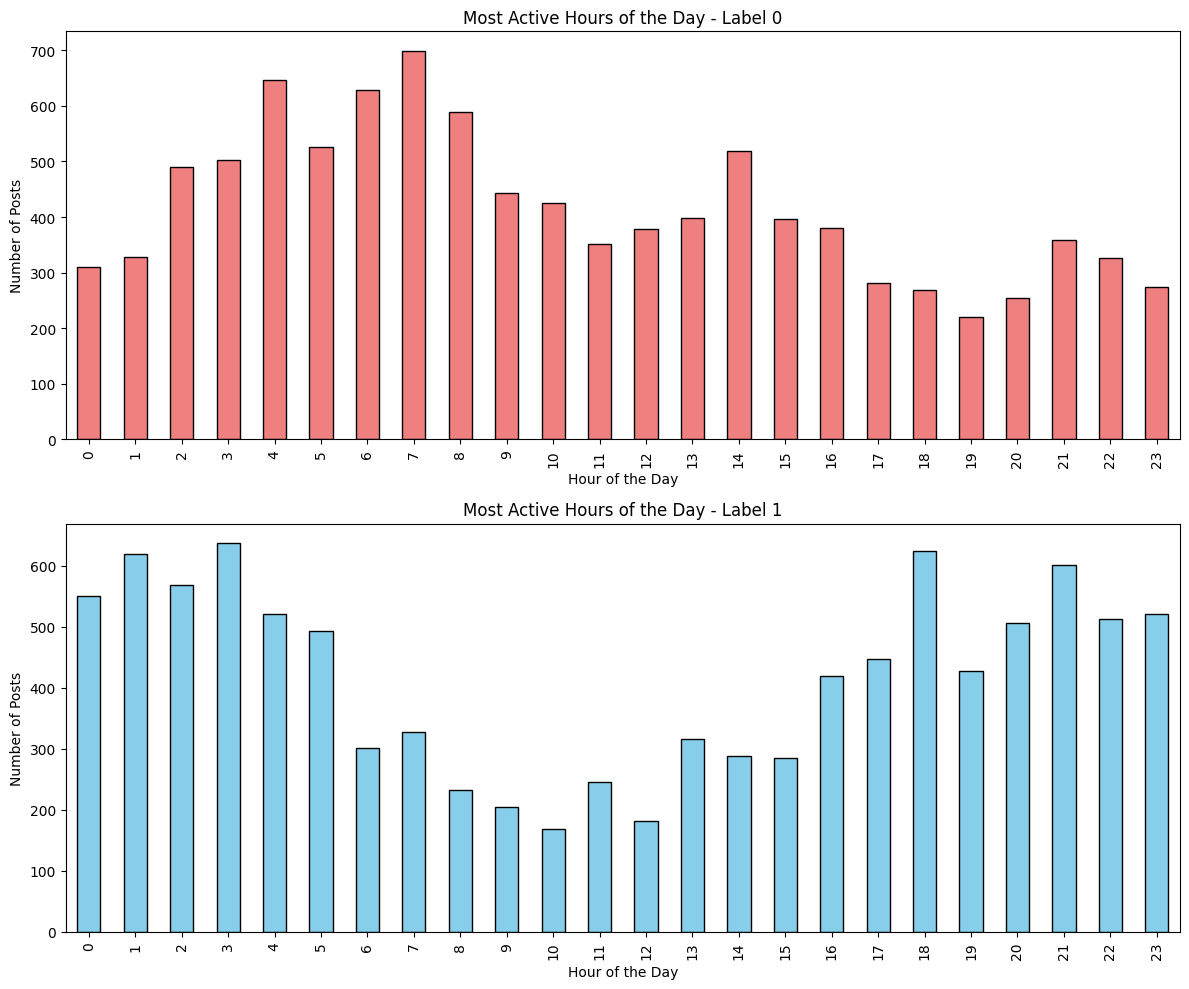

In [54]:
# Q: Investigate the busiest hours of both categories of users
# ans: we have analysed activeness by visualizing the number of tweets posted by users of both categories at each and
#      every hour of the day
# Analysis: Non Depressed users were found most active during late night and early morning while non depressed are found
#           most active during evening and late night

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df['post_created'] = pd.to_datetime(df['post_created'])
df['post_hour'] = df['post_created'].dt.hour

# Separate the DataFrame based on labels
df_label_0 = df[df['label'] == 0]
df_label_1 = df[df['label'] == 1]

# Calculate the count of posts for each hour of the day for label 0 and label 1
hourly_counts_label_0 = df_label_0['post_hour'].value_counts().sort_index()
hourly_counts_label_1 = df_label_1['post_hour'].value_counts().sort_index()

# Plotting the data
fig, axes = plt.subplots(nrows=2, figsize=(12, 10))

# Plot for Most Active Hours of the Day - Label 0
hourly_counts_label_0.plot(kind='bar', ax=axes[0], color='lightcoral', edgecolor='black')
axes[0].set_title('Most Active Hours of the Day - Label 0')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Number of Posts')
hourly_counts_label_1.plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title('Most Active Hours of the Day - Label 1')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Number of Posts')

plt.tight_layout()
plt.show()


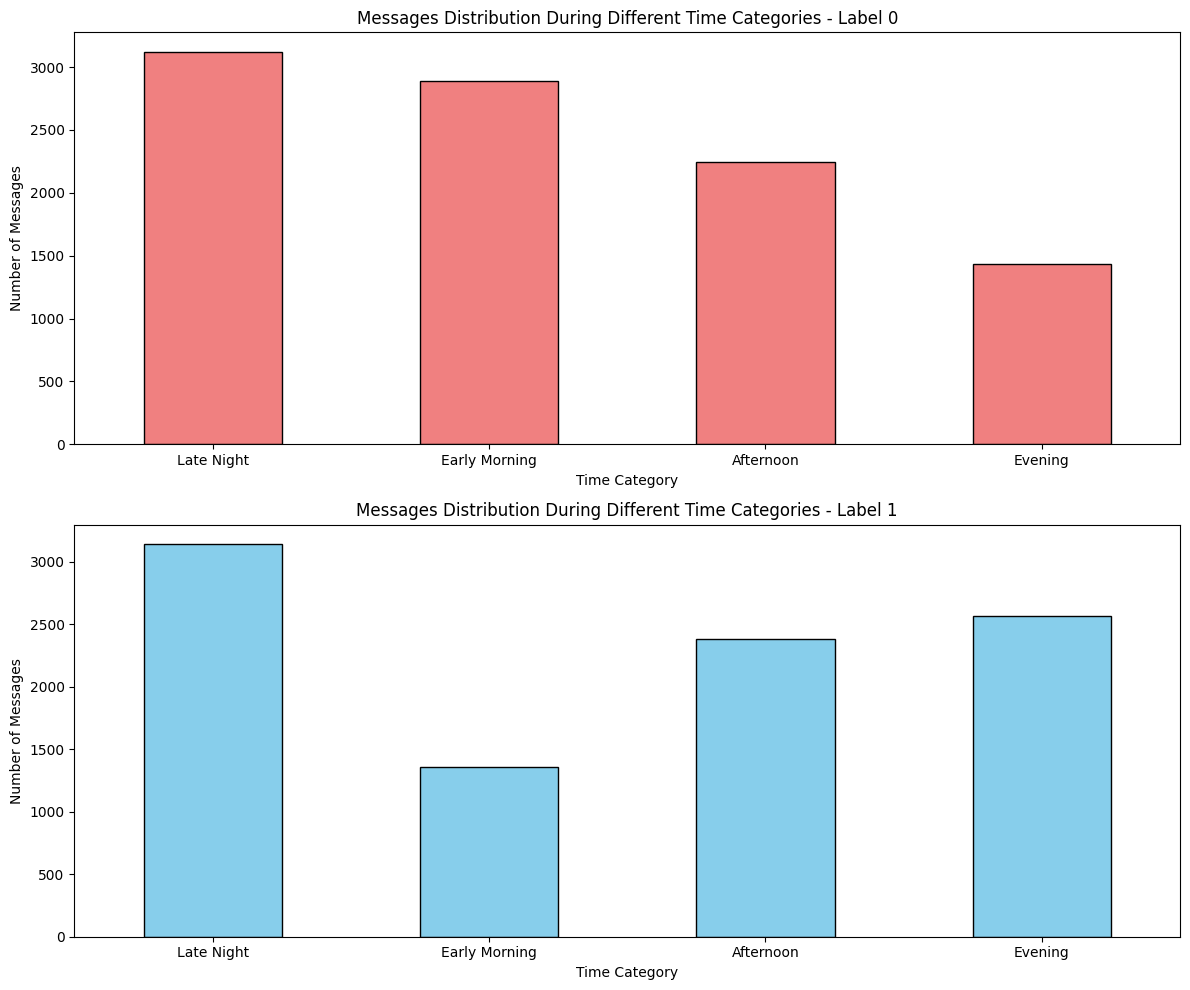

In [57]:

import pandas as pd
import matplotlib.pyplot as plt


df['post_created'] = pd.to_datetime(df['post_created'])
df['hour'] = df['post_created'].dt.hour

# Separate the DataFrame based on labels
df_label_0 = df[df['label'] == 0]
df_label_1 = df[df['label'] == 1]

# timeline shd. be changed
# Categorize hours into 'Late Night', 'Early Morning', 'Afternoon', 'Evening' for label 0
df_label_0['time_category'] = pd.cut(df_label_0['hour'], bins=[22, 5, 12, 17, 21], labels=['Late Night', 'Early Morning', 'Afternoon', 'Evening'])

# Categorize hours into 'Late Night', 'Early Morning', 'Afternoon', 'Evening' for label 1
df_label_1['time_category'] = pd.cut(df_label_1['hour'], bins=[22, 5, 12, 17, 21], labels=['Late Night', 'Early Morning', 'Afternoon', 'Evening'])

# Calculate the count of messages for each time category for label 0
time_category_counts_label_0 = df_label_0['time_category'].value_counts()

# Calculate the count of messages for each time category for label 1
time_category_counts_label_1 = df_label_1['time_category'].value_counts()

# Plotting the data
fig, axes = plt.subplots(nrows=2, figsize=(12, 10))

# Plot for Messages Distribution During Different Time Categories - Label 0
time_category_counts_label_0.sort_index().plot(kind='bar', ax=axes[0], color='lightcoral', edgecolor='black')
axes[0].set_title('Messages Distribution During Different Time Categories - Label 0')
axes[0].set_xlabel('Time Category')
axes[0].set_ylabel('Number of Messages')
axes[0].tick_params(axis='x', rotation=0)

# Plot for Messages Distribution During Different Time Categories - Label 1
time_category_counts_label_1.sort_index().plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_title('Messages Distribution During Different Time Categories - Label 1')
axes[1].set_xlabel('Time Category')
axes[1].set_ylabel('Number of Messages')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [67]:
# Q: How do self confessions about diagnosis of a particular disease vary throughout the year
# ans: Self confessions about diagnosis remained relatively low during the summer months and peaked towards the winter months as psychologists say
#      winter triggers depression known as Seasonal affective disorder (SAD) is a type of depression that comes and goes in a seasonal pattern. 
#      SAD is sometimes known as "winter depression" because the symptoms are usually more apparent and more severe during the winter.
#Analysis:  


import pandas as pd

class InclusionPatternFilter:
    def __init__(self, inclusion_patterns):
        self.inclusion_patterns = [pattern.lower() for pattern in inclusion_patterns]

    def matches(self, text):
        # Check if any of the inclusion patterns appear in the text
        return any(pattern in text.lower() for pattern in self.inclusion_patterns)

def identify_posts_with_diagnosis(posts, inclusion_patterns, column_name):
    inclusion_pattern_filter = InclusionPatternFilter(inclusion_patterns)

    posts_with_diagnosis = []
    for post in posts:
        # Check if the post in the specified column contains any inclusion pattern
        if inclusion_pattern_filter.matches(post[column_name]):
            posts_with_diagnosis.append(post)

    return posts_with_diagnosis


additional_inclusion_patterns = [

]


inclusion_patterns = [
    "diagnosis",
    "diagnose",
    "diagnoses",
    "diagnosing",
    "diagnosis",
    "diagnostic",
    "diagnostic test",
    "self-diagnosis",
    "clinical diagnosis",
    "formal diagnosis",
    "official diagnosis",
    "recently diagnosed",
    "been diagnosed",
    "has been diagnosed",
    "have been diagnosed",
    "haven't been diagnosed",
    "clinically diagnosed",
    "not diagnosed",
    "not formally diagnosed",
    "no diagnosis",
    "policy against diagnosis"
   
]


combined_inclusion_patterns = inclusion_patterns + additional_inclusion_patterns


column_name = 'filtered'


posts_with_diagnosis = identify_posts_with_diagnosis(df.to_dict('records'), combined_inclusion_patterns, column_name)


df_diagnosis_posts = pd.DataFrame(posts_with_diagnosis)


print(df_diagnosis_posts.head(30))


    Unnamed: 0             post_id              post_created  \
0            0  637894677824413696 2015-08-30 07:48:37+00:00   
1          117  633303580217344000 2015-08-17 15:45:14+00:00   
2          410  658851984200630272 2015-10-27 03:45:28+00:00   
3          415  658743793278152705 2015-10-26 20:35:33+00:00   
4          454  657953608785338368 2015-10-24 16:15:39+00:00   
5          571  655658458738466816 2015-10-18 08:15:32+00:00   
6          599  655409328762060800 2015-10-17 15:45:35+00:00   
7          604  655371564569989121 2015-10-17 13:15:31+00:00   
8          838  652827334077231104 2015-10-10 12:45:40+00:00   
9          893  559022708764454912 2015-01-24 16:19:34+00:00   
10         922  329640942791430144 2013-05-01 16:58:19+00:00   
11         978  665760488760872960 2015-11-15 05:17:24+00:00   
12        1018  567130171292270592 2015-02-16 01:15:44+00:00   
13        1206  651747762158084096 2015-10-07 13:15:50+00:00   
14        1325  581367481517940736 2015-

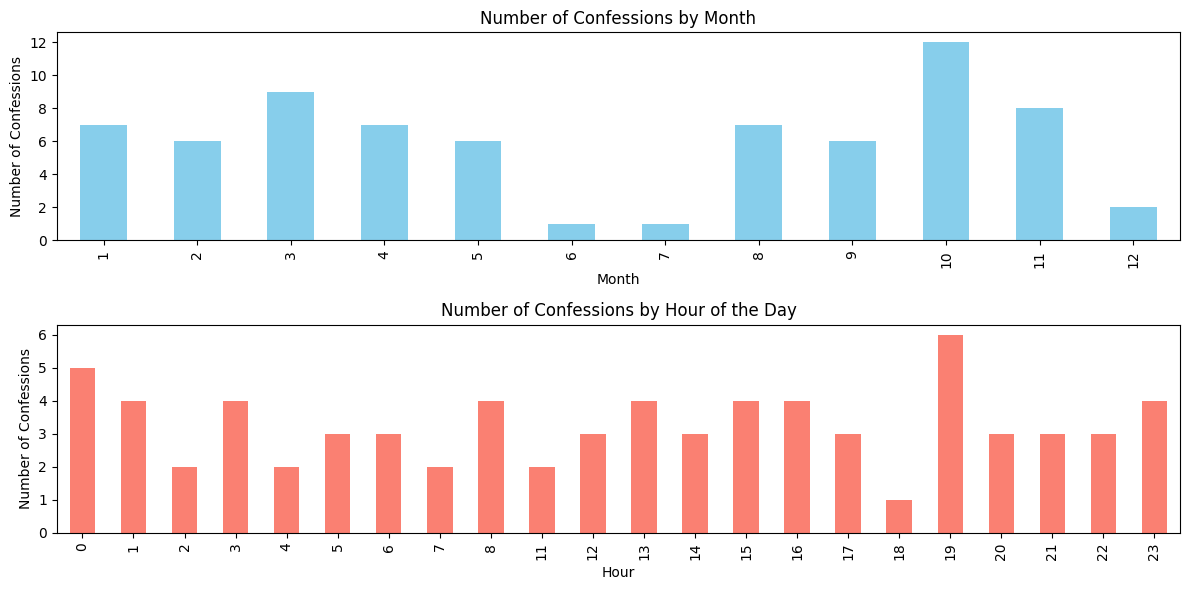

In [73]:

df_diagnosis_posts['post_created'] = pd.to_datetime(df_diagnosis_posts['post_created'])


df_diagnosis_posts['month'] = df_diagnosis_posts['post_created'].dt.month
df_diagnosis_posts['hour'] = df_diagnosis_posts['post_created'].dt.hour


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
df_diagnosis_posts['month'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Confessions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Confessions')

plt.subplot(2, 1, 2)
df_diagnosis_posts['hour'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Number of Confessions by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Confessions')

plt.tight_layout()
plt.show()

In [ ]:
# Q: Investigate whether online friends are real or fake ??
# ans: In context to our dataframe, we can visualize how the number of friends differ for depressed and non depressed 
# Analysis: Depressed users come out with more number of friends than non depressed users. This allows us to conclude that
#           more online friends dosnot ensure that the person is mentally healthy.

import pandas as pd

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame if different

# Select relevant columns and drop duplicates based on user_id
user_data = df[['user_id', 'friends', 'followers', 'favourites', 'label']].drop_duplicates()

# Sort the DataFrame by 'friends' column in decreasing order
user_data_sorted = user_data.sort_values(by='friends', ascending=False)

# Display the resulting sorted DataFrame
print(user_data_sorted)

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame if different

# Select relevant columns and drop duplicates based on user_id
user_data = df[['user_id', 'friends', 'followers', 'favourites', 'label']].drop_duplicates()

# Sort the DataFrame by 'friends' column in decreasing order
user_data_sorted = user_data.sort_values(by='friends', ascending=False)

# Select the first 60 ids out of 72 unique ids
user_data_top60 = user_data_sorted.head(60)

# Display the resulting sorted DataFrame for the first 60 user ids
print(user_data_top60)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Replace 'df' with the actual name of your DataFrame if different

# Select relevant columns and drop duplicates based on user_id
user_data = df[['user_id', 'friends', 'label']].drop_duplicates()

# Separate data for label 0 and label 1
user_data_label_0 = user_data[user_data['label'] == 0]
user_data_label_1 = user_data[user_data['label'] == 1]

# Sort the DataFrames by 'user_id'
user_data_label_0_sorted = user_data_label_0.sort_values(by='user_id')
user_data_label_1_sorted = user_data_label_1.sort_values(by='user_id')

# Convert 'user_id' to string to ensure proper plotting
user_data_label_0_sorted['user_id'] = user_data_label_0_sorted['user_id'].astype(str)
user_data_label_1_sorted['user_id'] = user_data_label_1_sorted['user_id'].astype(str)

# Create line graphs for label 0 and label 1
plt.figure(figsize=(12, 6))

plt.plot(user_data_label_0_sorted['user_id'], user_data_label_0_sorted['friends'], label='Label 0', marker='o', linestyle='-')
plt.plot(user_data_label_1_sorted['user_id'], user_data_label_1_sorted['friends'], label='Label 1', marker='o', linestyle='-')

plt.title('User ID vs Friends Comparison')
plt.xlabel('User ID')
plt.ylabel('Friends')
plt.legend()
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()


In [ ]:
# Here we have extended the above approach taking 'followers' as the basis of our analysis

import pandas as pd
import matplotlib.pyplot as plt


# Select relevant columns and drop duplicates based on user_id
user_data = df[['user_id', 'friends', 'label']].drop_duplicates()

# Separate data for label 0 and label 1
user_data_label_0 = user_data[user_data['label'] == 0]
user_data_label_1 = user_data[user_data['label'] == 1]

# Sort the DataFrames by 'user_id'
user_data_label_0_sorted = user_data_label_0.sort_values(by='user_id')
user_data_label_1_sorted = user_data_label_1.sort_values(by='user_id')

# Convert 'user_id' to string to ensure proper plotting
user_data_label_0_sorted['user_id'] = user_data_label_0_sorted['user_id'].astype(str)
user_data_label_1_sorted['user_id'] = user_data_label_1_sorted['user_id'].astype(str)

# Create line graphs for label 0 and label 1
plt.figure(figsize=(12, 6))

plt.plot(user_data_label_0_sorted['user_id'], user_data_label_0_sorted['followers'], label='Label 0', marker='o', linestyle='-')
plt.plot(user_data_label_1_sorted['user_id'], user_data_label_1_sorted['followers'], label='Label 1', marker='o', linestyle='-')

plt.title('User ID vs Followers Comparison')
plt.xlabel('User ID')
plt.ylabel('Followers')
plt.legend()
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()
